<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Two-tone-spectroscopy" data-toc-modified-id="Two-tone-spectroscopy-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Two-tone spectroscopy</a></span><ul class="toc-item"><li><span><a href="#Import-data" data-toc-modified-id="Import-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Import data</a></span></li><li><span><a href="#Plot-and-extract" data-toc-modified-id="Plot-and-extract-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Plot and extract</a></span></li><li><span><a href="#Fiting" data-toc-modified-id="Fiting-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Fiting</a></span></li></ul></li></ul></div>

# Import

In [12]:
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import numpy as np
import h5py
from qutip import*
import sys
sys.path.append("/Users/longnguyen/Documents/Data/fluxonium")
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
from Fluxonium_hamiltonians import Single_small_junction as fluxonium
import matplotlib as mpl
from mpl_point_clicker import clicker
import scipy.constants as cst
mpl.rcParams['figure.dpi']= 100
mpl.rc('lines',
       linewidth=1,
       dashed_pattern=[4, 3],
       dashdot_pattern=[4, 2, 1, 2],
       dotted_pattern=[1, 2])

mpl.rc('font',
       family='serif',
       size=16)

mpl.rc('mathtext',
       fontset='cm')

# mpl.rc('axes',
#        linewidth=1,
#        titlesize=16,
#        labelsize=16,
#        titlepad=10,
#        )

mpl.rc('xtick',
       top=True,
       labelsize=16,
       direction='in')

mpl.rc('xtick.major',
       size=4,
       width=1.25)

mpl.rc('xtick.minor',
       size=2,
       width=1.25,
       visible=True)

plt.rc('ytick',
       right=True,
       labelsize=16,
       direction='in')

mpl.rc('ytick.major',
       size=4,
       width=1.25)

mpl.rc('ytick.minor',
       size=2,
       width=1.25,
       visible=True)

mpl.rc('legend',
       fontsize=15)

mpl.rc('figure',
       titlesize=15)

mpl.rcParams['axes.linewidth'] = 1.25

# Two-tone spectroscopy
## Import data

In [4]:
fname=r'/Users/longnguyen/Documents/Data/fluxonium/Q3_two_tone_flux_sweep_7.hdf5'
f = h5py.File(fname,'r')
print (f.keys())

<KeysViewHDF5 ['Channels', 'Data', 'Instrument config', 'Instruments', 'Log list', 'Settings', 'Step config', 'Step list', 'Tags', 'Views']>


In [5]:
np.array(f.get('Data').get('Channel names'))

array([(b'SGS - Frequency', b''),
       (b'Yokogawa GS200 DC Source - Current', b''),
       (b'Signal Demodulation - Value', b'Real'),
       (b'Signal Demodulation - Value', b'Imaginary')],
      dtype=[('name', 'O'), ('info', 'O')])

In [6]:
f.get('Data').get('Data')

<HDF5 dataset "Data": shape (6501, 4, 135), type "<f8">

In [33]:
data = np.array(f.get('Data').get('Data'))

In [34]:
dat_freq = data[:,0,0]*1e-9
dat_current = data[0,1,:]*1e3
dat_real = data[:,2,:]
dat_imag = data[:,3,:]
dat_phase = np.angle(dat_real + 1j*dat_imag)
dat_mag = np.sqrt(dat_real**2 + dat_imag**2)

for idx in range(len(current)):
    dat_phase[:,idx] = dat_phase[:,idx] - np.mean(dat_phase[:,idx])

## Plot and extract

<IPython.core.display.Javascript object>


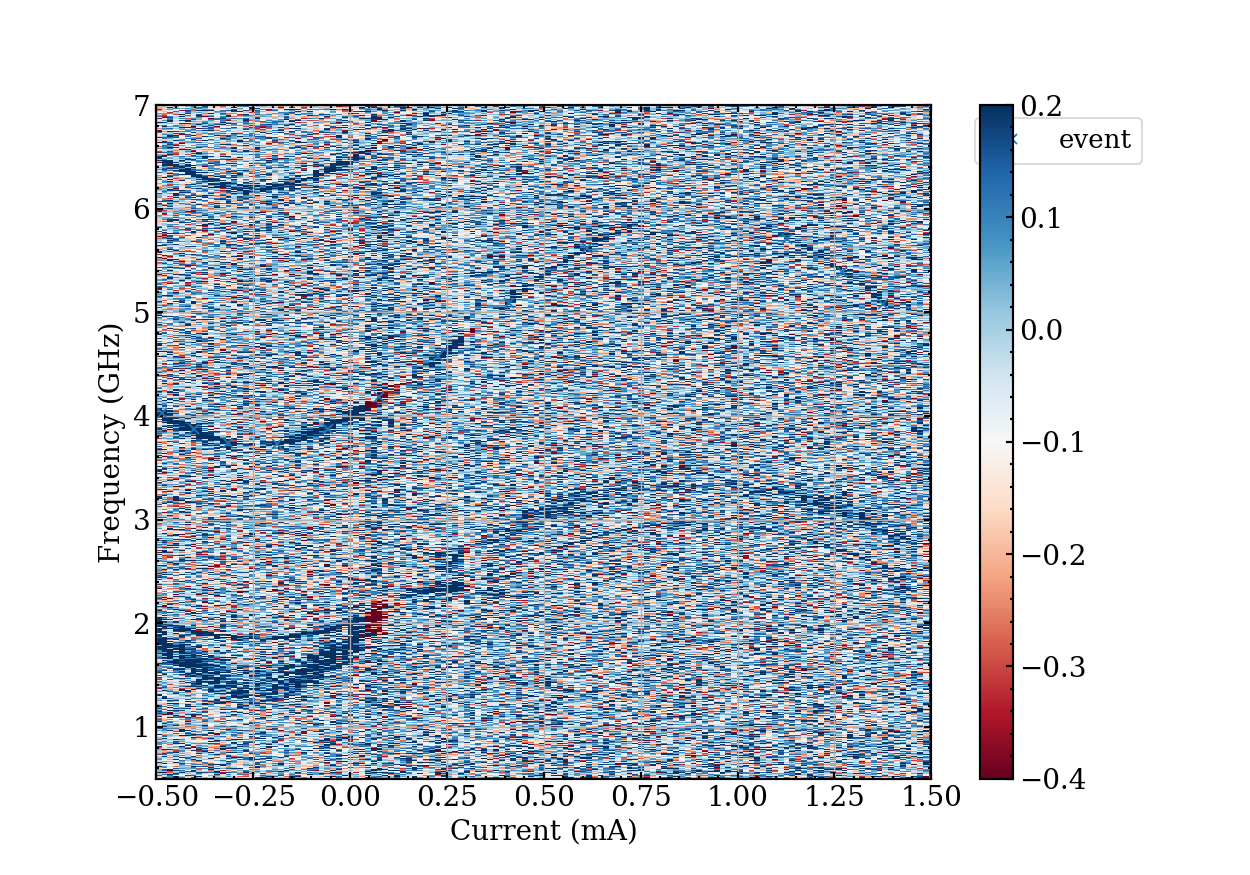

In [14]:
from matplotlib import pyplot as plt
%matplotlib notebook
fig,ax = plt.subplots(figsize = [10,7])
X,Y = np.meshgrid(dat_current, dat_freq)
Z = dat_phase
plt.pcolormesh(X,Y,Z, vmin = -0.4, vmax = 0.2, cmap = 'RdBu')
plt.xlabel('Current (mA)')
plt.ylabel('Frequency (GHz)')
plt.colorbar()
plt.grid()
klicker = clicker(ax, ["event"], markers=["x"])
plt.show()

In [15]:
plt.close('all')
clicked_points=klicker.get_positions()
clicked_points

{'event': array([[-0.48560486,  4.02766699],
        [-0.40173389,  3.87089519],
        [-0.31463712,  3.73824213],
        [-0.18883066,  3.72618276],
        [-0.0565726 ,  3.87089519],
        [ 0.07568546,  4.18443879],
        [ 0.22729837,  4.58239798],
        [ 0.41116934,  5.08889148],
        [ 0.61116934,  5.61950373],
        [ 1.12729837,  5.70391931],
        [ 1.26923385,  5.39037571],
        [ 1.37568546,  5.07683211]])}

In [16]:
%matplotlib inline
current1 = clicked_points['event'][:,0]
freq1= clicked_points['event'][:,1]

## Fiting

E_j=1.31952575342996, E_c=0.9279984861375302, E_l=0.7314235284018918


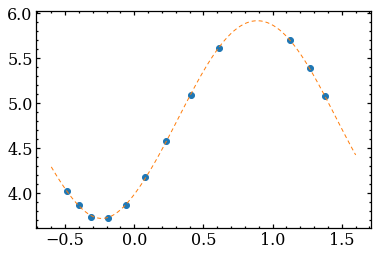

In [23]:
%matplotlib inline
plt.plot(current1, freq1, 'o')

#Define constants
e = 1.602e-19    #Fundamental charge
h = 6.62e-34    #Placnk's constant
phi_o = h/(2*e) #Flux quantum

N = 30
a = tensor(destroy(N))
phi = (a + a.dag()) * (8.0 * E_c / E_l) ** (0.25) / np.sqrt(2.0)
na = 1.0j * (a.dag() - a) * (E_l / (8 * E_c)) ** (0.25) / np.sqrt(2.0)

E_j_guess = 1.4
E_c_guess = 1
E_l_guess = 0.75

current_0_flux = 0.8
current_half_flux = -0.25
I_o_guess = (current_0_flux-current_half_flux)/0.5
offset_guess = current_0_flux
guess = ([E_j_guess, E_c_guess, E_l_guess,I_o_guess, offset_guess])

def trans_energy(current, E_j, E_c, E_l, I_o, offset):
    energy1 = np.zeros(len(current1))
#     energy2 = np.zeros(len(current2))

    flux1 = (current1-offset)/I_o
    phi_ext1 = flux1 * 2 * np.pi
    for idx in range(len(current1)):
        ope = 1.0j * (phi - phi_ext1[idx])
        H = 4.0 * E_c * na ** 2.0 + 0.5 * E_l * phi ** 2.0 - 0.5 * E_j * (ope.expm() + (-ope).expm())
        energy1[idx] = H.eigenenergies()[2] - H.eigenenergies()[0]

    # flux2 = current2 * phi_o / I_o
    # phi_ext2 = (flux2 / phi_o - offset) * 2 * np.pi
    # a = tensor(destroy(N))
    # phi = (a + a.dag()) * (8.0 * E_c / E_l) ** (0.25) / np.sqrt(2.0)
    # na = 1.0j * (a.dag() - a) * (E_l / (8 * E_c)) ** (0.25) / np.sqrt(2.0)
    # for idx in range(len(current2)):
    #     ope = 1.0j * (phi - phi_ext2[idx])
    #     H = 4.0 * E_c * na ** 2.0 + 0.5 * E_l * phi ** 2.0 - 0.5 * E_j * (ope.expm() + (-ope).expm())
    #     energy2[idx] = H.eigenenergies()[2] - H.eigenenergies()[0]

    # return np.concatenate([energy1, energy2], axis=0)
    return energy1

opt, cov = curve_fit(trans_energy, xdata=current1, ydata=freq1, p0=guess)
print ('E_j=' + str(opt[0]) + ', E_c=' + str(opt[1]) + ', E_l=' + str(opt[2]))

############################################################################################################
# E_l,E_c,E_j,I_o,offset = E_l_guess, E_c_guess, E_j_guess,I_o_guess,offset_guess
E_j,E_c,E_l,I_o,offset = opt
current = np.linspace(-0.6,1.6,101)
energy = np.zeros((len(current),5))

flux = (current-offset)/I_o
phi_ext = flux * 2 * np.pi
for idx in range(len(phi_ext)):
    ope = 1.0j * (phi - phi_ext[idx])
    H = 4.0 * E_c * na ** 2.0 + 0.5 * E_l * phi ** 2.0 - 0.5 * E_j * (ope.expm() + (-ope).expm())
    energy[idx,0] = H.eigenenergies()[2] - H.eigenenergies()[0]

# cut = 400
plt.plot(current, energy[:,0],'--')
# plt.plot(current*1e3, energy[:,1],'--')


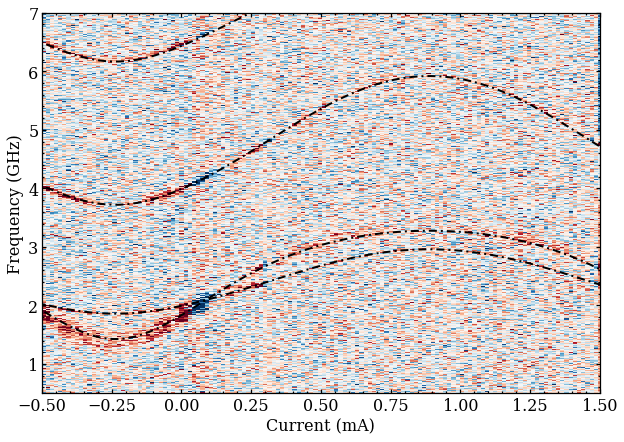

In [50]:
plt.figure(figsize = [10,7])
plt.pcolormesh(X,Y,Z, vmin = -0.5, vmax = 0.5, cmap = 'RdBu_r')
plt.xlabel('Current (mA)',fontsize = 16)
plt.ylabel('Frequency (GHz)',fontsize = 16)

level_num=5
energies = np.zeros((len(current),level_num))
for idx in range(len(phi_ext)):
    ope = 1.0j * (phi - phi_ext[idx])
    H = 4.0 * E_c * na ** 2.0 + 0.5 * E_l * phi ** 2.0 - 0.5 * E_j * (ope.expm() + (-ope).expm())
    energies[idx,:] = H.eigenenergies()[0:level_num]
    
energy[:,0] = energies[:,1] - energies[:,0]
energy[:,1] = energies[:,2] - energies[:,0]
energy[:,2] = energies[:,3] - energies[:,0]
energy[:,3] = (energies[:,2] - energies[:,0])/2

for idx in range(4):
    plt.plot(current, energy[:,idx],linewidth = 2, color = 'k', linestyle = '-.')   
plt.xlim(dat_current[0], dat_current[-1])
plt.ylim(dat_freq[0], dat_freq[-1])
plt.tick_params(labelsize=16)